## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

We will look at different parameters of the dataset and see how that parameters affect the the variable that we want to predict. Data parameters will be visually inspected and we'll see observe the relationships and handle parameters that might not be helpful. We will statistically observe the data and observe how it is spread.
Visually inspecting data makes it really helpful to observe the entire dataset altogether and implement transformations that will help in making an efficient model.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

The constituents of wine/ age/ special ingredients/ chemical composition are some of the factors that can affect the quality of wine. 

### Data Collection

**Q3. From where do we get our data?**
We can get our data from surveys, industries, simulations, publications, experiments etc. For this project the data is taken from a csv file from [here](https://georgiancollege-my.sharepoint.com/personal/archit_garg_georgiancollege_ca/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Farchit%5Fgarg%5Fgeorgiancollege%5Fca%2FDocuments%2FAIDM%2FProject%2D1&originalPath=aHR0cHM6Ly9nZW9yZ2lhbmNvbGxlZ2UtbXkuc2hhcmVwb2ludC5jb20vOmY6L2cvcGVyc29uYWwvYXJjaGl0X2dhcmdfZ2VvcmdpYW5jb2xsZWdlX2NhL0VnLWxxWWRCR2xKUHE2VFdnYVJja1FFQkd1bVRPdTVBT3ZIVjRHdW5IWDY0d0E%5FcnRpbWU9X0hxeC1nYU4yVWc).

# Prediction Red Wine Quality
> Name: Sharun Garg  
Student ID: 200493338

## 1. Importing the important libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
data = pd.read_csv('winequality-red.csv')
data.sample(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1017,8.0,0.18,0.37,0.90,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
1195,6.2,0.43,0.22,1.80,0.078,21.0,56.0,0.99633,3.52,0.60,9.5,6
599,12.7,0.59,0.45,2.30,0.082,11.0,22.0,1.00000,3.00,0.70,9.3,6
323,10.3,0.59,0.42,2.80,0.090,35.0,73.0,0.99900,3.28,0.70,9.5,6
395,12.0,0.37,0.76,4.20,0.066,7.0,38.0,1.00040,3.22,0.60,13.0,7
171,8.0,0.42,0.17,2.00,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,6
721,8.9,0.48,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2,5


### Dataset Columns


Feature Variables
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 
  
Output variable (based on sensory data):
- quality (score between 3 and 8)

### Splitting the data into feature set and label set

In [3]:
data_copy = data.copy()
features = data_copy.drop(['quality'], axis = 1)
labels = data_copy['quality']

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**  
Red wine samples of the Portuguese "Vinho Verde" wine are obtained from the North of Portugal.  
> **Reference:**  
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

**Q5. How can knowing the impact of each variable on the red wine quality help businesses (producers, distributors, etc)?**  
Knowing the impact of each variable on the quality can help producers control those variable while wine production to make the best quality wines like the alcohol content, sugar, acidity etc. Distributers then can do the required packaging that will maintain the the quantity of those variables.  

### Data Shape

In [4]:
print(f'Data Shape: {data.shape}')
print(f'Features Shape: {features.shape}')
print(f'Labels Shape: {labels.shape}')

Data Shape: (1599, 12)
Features Shape: (1599, 11)
Labels Shape: (1599,)


> **Our data has 1599 entries with 12 columns. 11 of them are features and the last column is of quality**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


> **There are no null values in data and our data is complete. The datatypes are also all numbers, so we won't need to encode any variables.**

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


> The Standard Deviation for 'free sulfur dioxide' and 'total sulfur dioxide' is quite high meaning data for these two variables is very dispersed.  
Also the difference between 75th percentile and Max values for 'free sulfur dioxide', 'total sulfur dioxide' and 'residual sugar' is a lot indicating the presence of some outliers.

### Data Preparation

#### Explore the dataset further
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

**Checking for Null values**

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

> There are no null values and our data is complete

**The quality variable analysis**

In [8]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

> Most of the data points are for quality 5, 6 and 7, so we might expect a low performance when predicting qualities of 3, 4 and 8.

**Helper functions for SCATTER PLOT AND HISTOGRAMS**

In [9]:
def scatter(attribute):
    att = features[attribute].values
    plt.figure(figsize=(5, 4))
    plt.scatter(att, labels.values, color='r', s = 2)
    plt.ylabel("Quality")
    plt.xlabel(attribute)
    plt.tight_layout()
    plt.show()
    
def histograms(attribute):
    att = features[attribute].values
    sns.distplot(a=data[attribute], kde=False, color='r')
    plt.ylabel("Number of datapoints")
    plt.show()

### Heatmap

<AxesSubplot:>

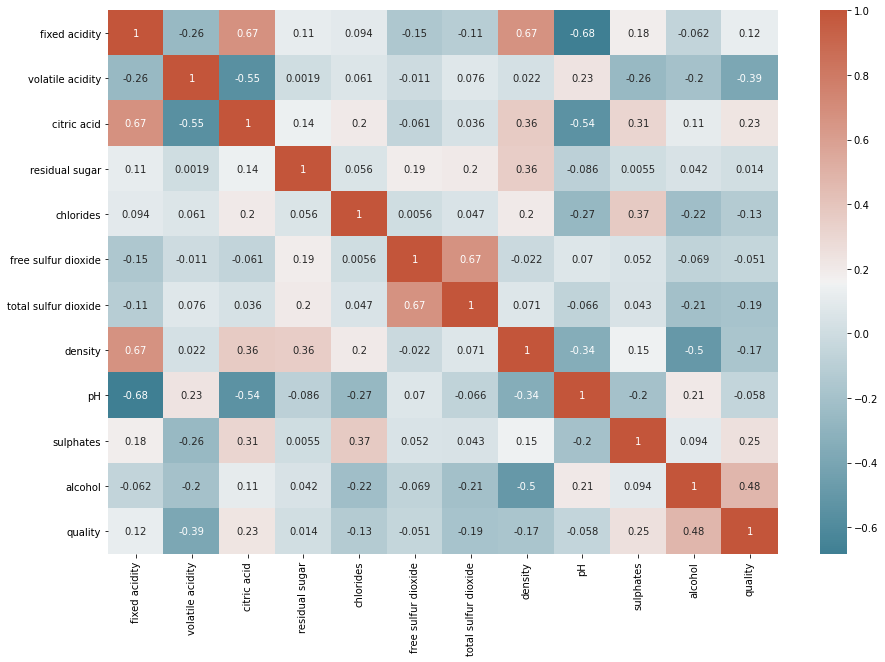

In [10]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


> **Observation:**  
> ALCOHOL is the most correlated factor with the QUALITY with a linear relationship followed by SULPHATES and CITRIC ACID.  
VOLATILE ACIDITY if highest inversely correlated to the quality.  
There aren't any very highly correlated factors with value above 0.7, so we don't need to drop any columns from our feature set.

### Scatter Plotting the values for each attribute for their respective quality and observing outliers

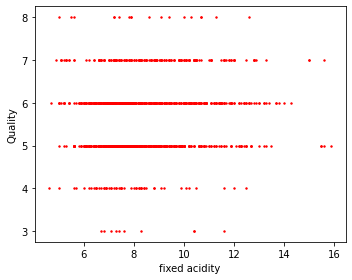

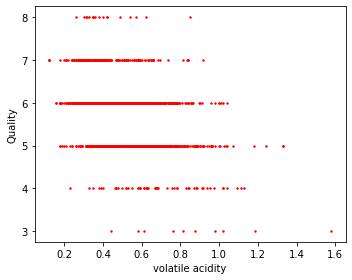

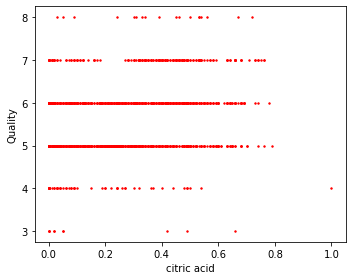

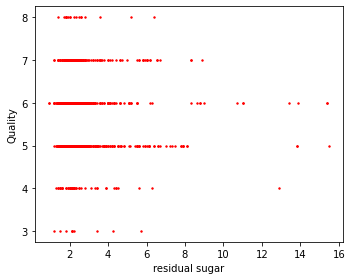

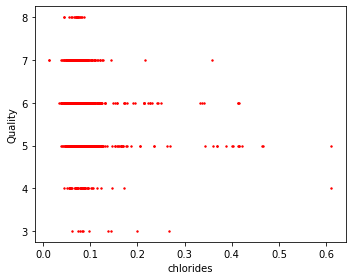

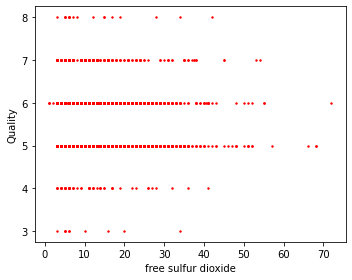

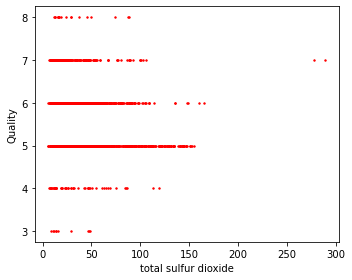

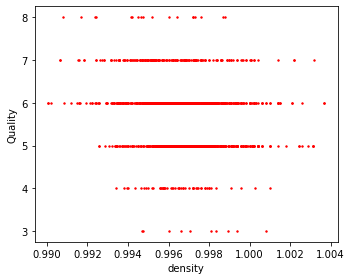

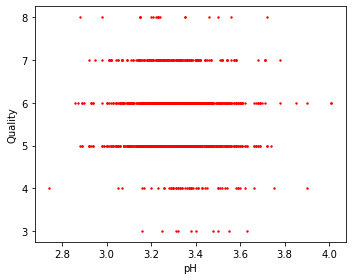

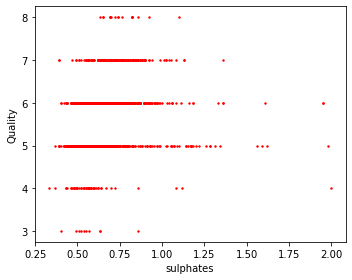

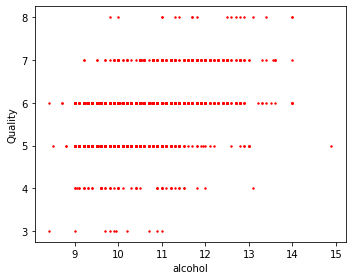

In [11]:
for col in features.columns:
    scatter(col)

> **Fixed Acidity**  
Most of the data for all the qualities are under the value of 14, with few outliers above 14 in case of quality 5 and 7. But however, the data for 5 and 7 is closely packed for value under 14, we'll remove these outliers
&nbsp;  
&nbsp;  
**Volatile Acidity**  
We can see most of the data under the value of 1.1. But, the values for quantity 3 are spread accross the axes, we'll not remove them as they can be deciding factors for quality of 3.
&nbsp;  
&nbsp;  
**Citric Acid**  
Most of the data is packed under the value of 0.8. The outlier for quality 4 can be removed as other values are closely placed under 0.6
&nbsp;  
&nbsp;  
**Residual Sugar**  
Most of the data is packed under the value of 10. The outliers can be removed as other values are closely placed under 12.
&nbsp;  
&nbsp;  
**Chlorides**  
Most of the data is packed under the value of 0.3. The outliers can be removed as other values are closely placed under 0.5.
&nbsp;  
&nbsp;  
**Free Sulfur Dioxide**  
Most of the data is packed under the value of 60. The outliers can be removed for values above 60.
&nbsp;  
&nbsp;  
**Total Sulfur Dioxide**  
Most of the data is packed under the value of 150. The outliers can be removed as values for quality 7 are packed under ~120.
&nbsp;  
&nbsp;  
**Density**  
The data seems to be quite spread for all the qualities.
&nbsp;  
&nbsp;  
**pH**  
The data seems to be quite spread for all the qualities.
&nbsp;  
&nbsp;  
**Sulphates**  
Most of the data is packed under the value of 1.3. The outliers can be removed as values for quality 4-6 are packed under 1.75.
&nbsp;  
&nbsp;  
**Alcohol**  
The data seems to be quite spread for all the qualities.

### Removing Outliers

In [12]:
rows = data[
    (data['fixed acidity'] > 14) |
    (data['citric acid'] > 0.8) |
    (data['residual sugar'] > 8) |
    (data['chlorides'] > 0.3) |
    (data['free sulfur dioxide'] > 60) |
    (data['total sulfur dioxide'] > 175) |
    (data['sulphates'] > 1.75)
]
data_raw = data.copy()
features_raw = data_raw.drop(['quality'], axis = 1)
labels_raw = data_raw['quality']

data = data.drop(rows.index)
features = data.drop(['quality'], axis = 1)
labels = data['quality']

In [13]:
data.shape

(1542, 12)

> It can be observed that 57 Outliers were removed.

### Plotting the histograms for each attribute

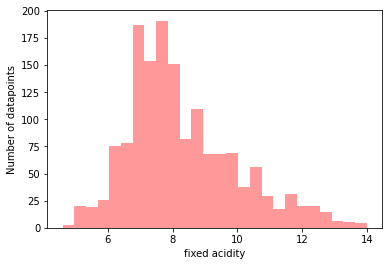

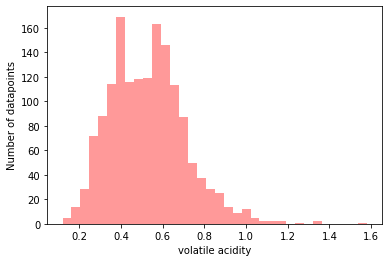

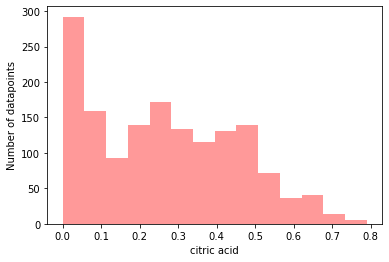

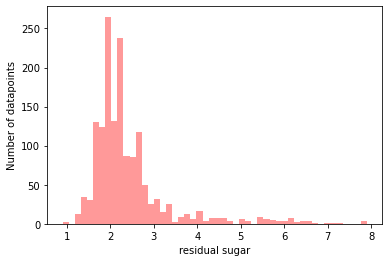

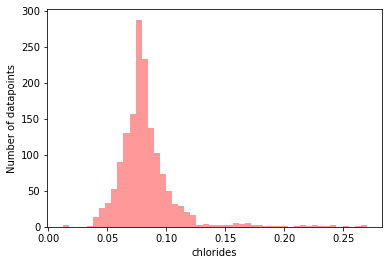

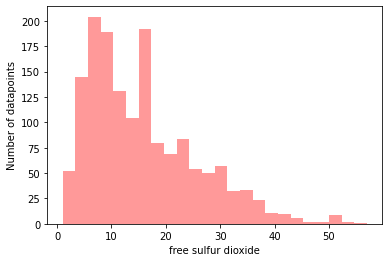

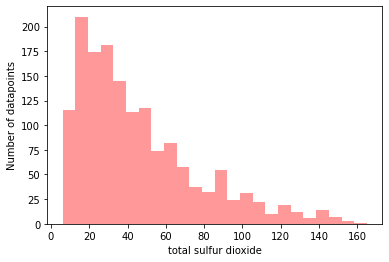

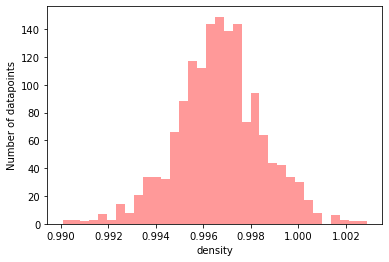

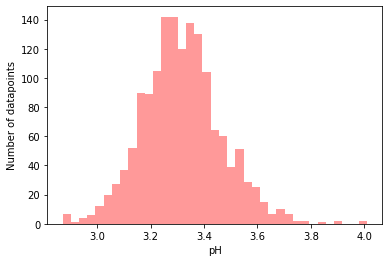

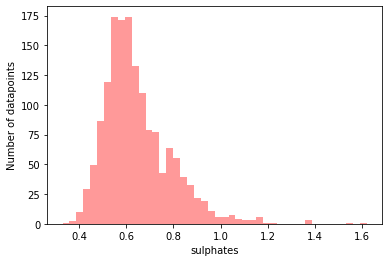

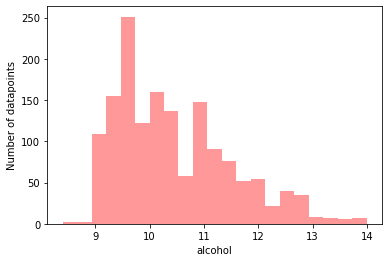

In [14]:
for col in features.columns:
    histograms(col)

>**Observation:**  
We can see that most of the data points are closely packed now and look normalised.

### Modeling

<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

## Building Regression Models:
>#### Model 1: Linear Regression  
>#### Model 2: Lasso Regression

>We will build a Linear Regression and Lasso Regression model on our cleaned data and also as we have preserved the original data in *data_raw* with all the outliers, we will also build another model with scaled data using **Robust Scaler** as it is good with automatic handling the outliers [more about robust scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html).

### Splitting the data into train and test set.

In [15]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, train_size=0.75)
features_train_raw, features_test_raw, labels_train_raw, labels_test_raw = train_test_split(features_raw, labels_raw, train_size=0.75)


**Scaling the raw data with outliers** 

In [16]:
def scale_data(feature):
    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(feature.values)
    return pd.DataFrame(data = scaled_data, columns=feature.columns)

In [17]:
features_train_scaled = scale_data(features_train_raw)
features_test_scaled = scale_data(features_test_raw)

### Helper methods for tuning hyper parameters

In [18]:
def tune_hyperparameters(model, input_params, training_data):
    cv = GridSearchCV(model, input_params, cv=5)
    cv.fit(training_data['features'], training_data['labels'])
    print(f"Best Estimator for {type(model).__name__}: ", cv.best_estimator_, "\n")
    model_results(cv)
    
def model_results(results):
    print(f"Best Parameters: {results.best_params_}\n")
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, param in zip(means, stds, results.cv_results_['params']):
        print(f"{round(mean, 3)} (+/- {round(std*2, 3)}) for {param}")

## Linear Regression Model

In [19]:
lnr_reg = LinearRegression()
lnr_reg.fit(features_train, labels_train)

LinearRegression()

#### Tuning Lasso Model for cleaned data.
> Model tuning using cleaned data without outliers

In [20]:
lasso_params = {
    'alpha' : [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3, 1e-2, 1, 5, 10]
}
tune_hyperparameters(model=Lasso(), input_params = lasso_params, training_data = {'features': features_train, 'labels': labels_train})



Best Estimator for Lasso:  Lasso(alpha=1e-05) 

Best Parameters: {'alpha': 1e-05}

0.345 (+/- 0.072) for {'alpha': 1e-15}
0.345 (+/- 0.072) for {'alpha': 1e-10}
0.345 (+/- 0.072) for {'alpha': 1e-08}
0.345 (+/- 0.072) for {'alpha': 1e-05}
0.345 (+/- 0.072) for {'alpha': 0.0001}
0.344 (+/- 0.076) for {'alpha': 0.001}
0.333 (+/- 0.083) for {'alpha': 0.01}
0.034 (+/- 0.036) for {'alpha': 1}
-0.004 (+/- 0.016) for {'alpha': 5}
-0.007 (+/- 0.012) for {'alpha': 10}


> The Alpha value or 0.00001 had the best performance of all the other values.

#### Tuning Lasso Model for raw data.
> Model tuning using scaled data with outliers

In [21]:
lasso_params = {
    'alpha' : [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10],
}
tune_hyperparameters(model=Lasso(), input_params = lasso_params, training_data = {'features': features_train_scaled, 'labels': labels_train_raw})



Best Estimator for Lasso:  Lasso(alpha=0.001) 

Best Parameters: {'alpha': 0.001}

0.351 (+/- 0.128) for {'alpha': 1e-15}
0.351 (+/- 0.128) for {'alpha': 1e-10}
0.351 (+/- 0.128) for {'alpha': 1e-08}
0.351 (+/- 0.128) for {'alpha': 1e-05}
0.351 (+/- 0.128) for {'alpha': 0.0001}
0.351 (+/- 0.126) for {'alpha': 0.001}
0.35 (+/- 0.117) for {'alpha': 0.01}
-0.006 (+/- 0.015) for {'alpha': 1}
-0.006 (+/- 0.015) for {'alpha': 5}
-0.006 (+/- 0.015) for {'alpha': 10}


> The Alpha value or 0.001 had the best performance of all the other values.

## Lasso Regression

In [22]:
las_reg1 = Lasso(alpha=0.00001)
las_reg1.fit(features_train, labels_train)

las_reg2 = Lasso(alpha=0.001)
las_reg2.fit(features_train_scaled, labels_train_raw)

print(f'{las_reg1}\n{las_reg2}')

Lasso(alpha=1e-05)
Lasso(alpha=0.001)


## Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

## Models Evaluation

In [23]:
def evaluation_metrices(true_labels, pred_labels):
    r_square = r2_score(true_labels, pred_labels, multioutput='variance_weighted')
    mae = mean_absolute_error(true_labels, pred_labels)
    rmse = np.sqrt(mean_squared_error(true_labels, pred_labels))
    print(f'\nMean Absolute Error: {np.round(mae, 4)} \nRoot Mean Squared Error: {np.round(rmse, 4)} \nR-Squared Value: {np.round(r_square, 4)}')
    

In [24]:
print("Performance Metrices of Linear Regression Model:")
pred = lnr_reg.predict(features_test)
evaluation_metrices(labels_test, pred)

Performance Metrices of Linear Regression Model:

Mean Absolute Error: 0.4726 
Root Mean Squared Error: 0.6149 
R-Squared Value: 0.3997


In [25]:
print("Performance Metrices of Lasso Regression Model:")
pred = las_reg1.predict(features_test)
evaluation_metrices(labels_test, pred)

Performance Metrices of Lasso Regression Model:

Mean Absolute Error: 0.4726 
Root Mean Squared Error: 0.615 
R-Squared Value: 0.3996


In [26]:
print("Performance Metrices of Lasso Regression Model trained on Scaled Data:")
pred = las_reg2.predict(features_test_scaled)
evaluation_metrices(labels_test_raw, pred)

Performance Metrices of Lasso Regression Model trained on Scaled Data:

Mean Absolute Error: 0.5075 
Root Mean Squared Error: 0.6599 
R-Squared Value: 0.3301


> #### OBSERVATION:  
The Lasso model with scaled data didn't do as well as the models with cleaned data with a low R-Squared value and high RMSE value.  
However, the performance of the other two models is also not as great as a Regression Model should have.  
We'll compare the performance of Linear Regression and Lasso Regression models both trained on cleaned data.  
&nbsp;  
&nbsp;  
**MEAN ABSOLUTE ERROR:**   
Both of them have almost equal MAE values of about 0.48. So our predicted values are not so far from the actual values with an error of about +/- 0.48
&nbsp;  
&nbsp;  
**ROOT MEAN SQUARE ERROR:**    
Both of them have almost equal MAE values of about 0.62. So there aren't many large errors that our models are giving
&nbsp;  
&nbsp;  
**R-SQUARED VALUE:**    
Both the models have an r-squared value of about 0.4. Values under 40% are not considered good for a regression model

## Feature Importance

In [27]:
def calculate_feature_importance(model):
    coeff = model.coef_
    features_coeff = pd.DataFrame(coeff, features.columns, columns=['Coefficient'])
    
    stdevs = []
    for i in features.columns:
        stdev = features[i].std()
        stdevs.append(stdev)
    
    features_coeff['std_dev'] = np.array(stdevs).reshape(-1,1)
    features_coeff['importance'] = np.abs(features_coeff['Coefficient']) * features_coeff['std_dev']
    features_coeff['Normalized Importance'] = np.round(100*features_coeff['importance'] / features_coeff['importance'].max(), 1)
    features_coeff = features_coeff.sort_values('Normalized Importance', ascending=False)
    print(features_coeff[['Coefficient', 'std_dev','Normalized Importance']])
    plt.barh(features_coeff.index, features_coeff['Normalized Importance'])

----FEATURES IMPORTANCE FOR LINEAR REGRESSION MODEL----

                      Coefficient    std_dev  Normalized Importance
alcohol                  0.301200   1.058801                  100.0
volatile acidity        -0.975871   0.179528                   54.9
sulphates                1.116864   0.144147                   50.5
total sulfur dioxide    -0.002990  31.363714                   29.4
pH                      -0.617122   0.149440                   28.9
chlorides               -1.382535   0.025170                   10.9
citric acid             -0.153135   0.191152                    9.2
free sulfur dioxide      0.002388  10.010317                    7.5
residual sugar           0.019244   0.937644                    5.7
fixed acidity            0.008507   1.683986                    4.5
density                 -6.622895   0.001828                    3.8


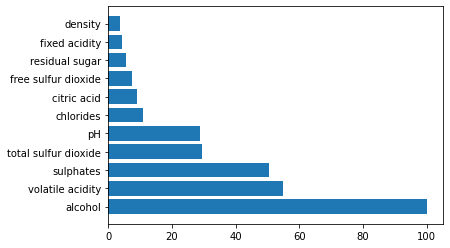

In [28]:
print("----FEATURES IMPORTANCE FOR LINEAR REGRESSION MODEL----\n")
calculate_feature_importance(lnr_reg)

----FEATURES IMPORTANCE FOR LASSO REGRESSION MODEL----

                      Coefficient    std_dev  Normalized Importance
alcohol                  0.307479   1.058801                  100.0
volatile acidity        -0.978892   0.179528                   54.0
sulphates                1.106842   0.144147                   49.0
pH                      -0.647853   0.149440                   29.7
total sulfur dioxide    -0.003012  31.363714                   29.0
chlorides               -1.401842   0.025170                   10.8
citric acid             -0.151841   0.191152                    8.9
free sulfur dioxide      0.002442  10.010317                    7.5
residual sugar           0.015567   0.937644                    4.5
fixed acidity            0.002500   1.683986                    1.3
density                 -0.000000   0.001828                    0.0


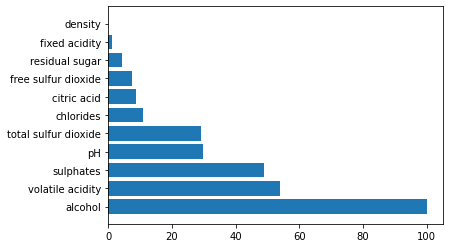

In [29]:
print("----FEATURES IMPORTANCE FOR LASSO REGRESSION MODEL----\n")
calculate_feature_importance(las_reg1)

>**OBSERVATION:**  
> - It can be observed from both the models that **alcohol** is the most crucial attribute in determining the quality of wine followed by **sulphates** and **volatile acidity**.  
> - **fixed acidity** and **density** are least important factors although they had a correlation of 0.15+ in our heatmap.  
> - The **sulfur dioxide** free/total has very small coefficients but as they data for these two values was very dispersed, we can see that they have an affect of the quality of wine with importance values of 40% and 20%.  
> - **residual sugar** has a very low importance and it was also visible in our heatmap with a correlation value of 0.015.

### Conclusion
We tested models on both cleaned data without outliers and scaled data with automatic handling of outliers and could observe that incorporating outliers in our data didn't have an impact on the performance of our model. Most of the important features also had a significant correlatioin value in our heatmap, but also there are attributes which have very low importance despite a good correlation score, implying the **correlation is not causation**.   

Alcohol content, sulphates, sulphur dioxide, acidity and pH are the key factors determing the quality of the wine. Alcohol content having a proportional relation with the quality whereas acidic wines are not a good quality wine and is visible from a negative coefficient. Manufacturers can work on these parameters to control the wine chemistry and product high quality product.